In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
from scipy import stats

In [ ]:
# connect to your drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/insurance.csv')

Mounted at /content/drive


# Pengambilan Dataset

In [ ]:
#Copy data agar tidak merubah data aslinya
df = data.copy()

In [ ]:
#Pengecekan detail informasi pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Eksplorasi singkat pada data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1. Analisa Descriptive Statistic

In [ ]:
#Descriptive statistic secara keseluruhan pada tipe data Numerik
numeric_data = df.select_dtypes(include=["int64","float64"]).columns
df[numeric_data].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Pengecekan analisa descriptive statistic secara keseluruhan pada tipe data kategorik
categoric_data = df.select_dtypes(include=["object"]).astype("category").columns
df[categoric_data].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

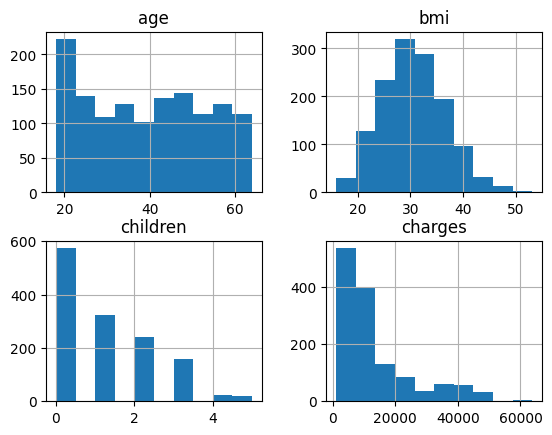

In [ ]:
df.hist()

## 1.1 Statistik Nasabah Berdasarkan Umur ditinjau dari Kategori Perokok vs Non Perokok

In [ ]:
#Rata-rata umur secara keseluruhan
df['age'].mean()

39.20702541106129

In [ ]:
#Rata-rata umur berdasarkan kategori Perokok vs Non Perokok
stat_age = df.groupby("smoker").agg({'age':['mean','median','max','min']}).reset_index()
stat_age.columns = ['smoker','mean_age','median_age','max_age','min_age']
stat_age

,smoker,mean_age,median_age,max_age,min_age
0,no,39.385338,40.0,64,18
1,yes,38.514599,38.0,64,18


Dapat dilihat pada tabel stat_age bahwa rata-rata umur non perokok dengan perokok tidak berbeda jauh, dengan rentang nilai antara 38 sampai 39 tahun.

<ipython-input-11-6025d044f576>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(smoker, color='red')
<ipython-input-11-6025d044f576>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_smoker, color='blue')


Text(-4.777777777777777, 0.5, 'Density')

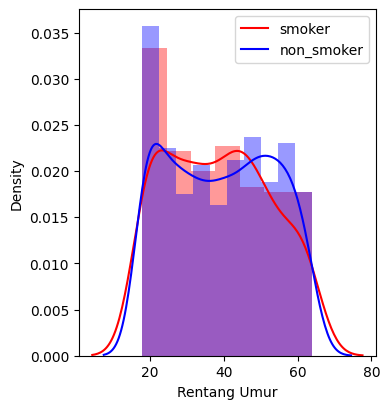

In [ ]:
smoker = df[df["smoker"]=="yes"][["age"]]
non_smoker = df[df["smoker"]=="no"][["age"]]
plt.figure(figsize = (4,4))
sns.distplot(smoker, color='red')
sns.distplot(non_smoker, color='blue')
plt.legend(labels=["smoker","non_smoker"])
plt.tight_layout()
plt.xlabel('Rentang Umur', fontsize=10)
plt.ylabel('Density',fontsize=10)

## 1.2 Statistik Nasabah Berdasarkan BMI ditinjau dari Kategori Perokok vs Non Perokok

In [ ]:
stat_bmi = df.groupby(["smoker"]).agg({'bmi':['mean','median','max','min']}).reset_index()
stat_bmi.columns = ['smoker','mean_bmi','median_bmi','max_bmi','min_bmi']
stat_bmi

,smoker,mean_bmi,median_bmi,max_bmi,min_bmi
0,no,30.651795,30.3525,53.13,15.960
1,yes,30.708449,30.4475,52.58,17.195


Nilai mean dan median bmi berdasarkan kategori Perokok vs Non Perokok memiliki nilai yang tidak berbeda jauh pada kisaran nilai ± 30.

<ipython-input-13-6c82f19d1cfe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(smoker, color='red')
<ipython-input-13-6c82f19d1cfe>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_smoker, color='blue')


Text(-4.777777777777777, 0.5, 'Density')

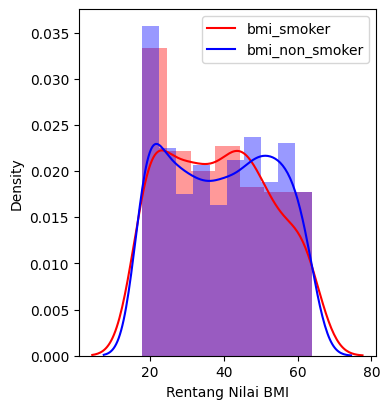

In [ ]:
bmi_smoker = df[df["smoker"]=="yes"][["bmi"]]
bmi_non_smoker = df[df["smoker"]=="no"][["bmi"]]
plt.figure(figsize = (4,4))
sns.distplot(smoker, color='red')
sns.distplot(non_smoker, color='blue')
plt.legend(labels=["bmi_smoker","bmi_non_smoker"])
plt.tight_layout()
plt.xlabel('Rentang Nilai BMI', fontsize=10)
plt.ylabel('Density', fontsize=10)

## 1.3 Variansi dari Tagihan Kesehatan Perokok vs Non Perokok

In [ ]:
df[df["smoker"]=="no"]["charges"].var()

35925420.496111736

In [ ]:
charges_var = df.groupby("smoker").agg({'charges':['var']}).reset_index()
charges_var.columns = ['smoker','varians_charges']
charges_var['varians_charges']

0    3.592542e+07
1    1.332073e+08
Name: varians_charges, dtype: float64

Terlihat nilai varians tagihan kesehatan Nasabah Perokok memiliki niali lebih besar dibandingkan dengan Nasabah non Perokok dengan nilai 133207311.20634924.

## 1.4 Rata-Rata Tagihan Kesehatan Perokok vs Non Perokok

In [ ]:
charges_mean = df.groupby("smoker").agg({'charges':['mean']}).reset_index()
charges_mean.columns = ['smoker','mean_charges']
charges_mean

,smoker,mean_charges
0,no,8434.268298
1,yes,32050.231832


Terlihat rata-rata nilai tagihan kesehatan Nasabah Perokok memiliki nilai lebih besar dibandingkan dengan Nasabah non Perokok dengan nilai 32050.231832.

 ## 1.5 Rata-rata Tagihan Kesehatan Perokok vs Non Perokok dengan BMI diatas 25



In [ ]:
bmi_more_than_25 = df[df["bmi"]>25]
mean_bmi_more_25 = bmi_more_than_25.groupby(["smoker"]).agg({'charges':['mean']}).reset_index()
mean_bmi_more_25.columns=["smoker","mean_charges_bmi_more_than_25"]
mean_bmi_more_25

,smoker,mean_charges_bmi_more_than_25
0,no,8629.589610
1,yes,35116.909657


Terlihat rata-rata nilai tagihan kesehatan Nasabah dengan BMI diatas 25 memiliki nilai lebih besar pada Nasabah Perokok dibandingkan dengan Nasabah non Perokok dengan nilai 35116.909657.

## 1.6 Rata-rata Tagihan Kesehatan Berdasarkan Wilayah


In [ ]:
region_stat = df.groupby("region").agg({'charges':['mean','median']}).reset_index()
region_stat.columns = ['region','mean_charges','median_charges']
region_stat

,region,mean_charges,median_charges
0,northeast,13406.384516,10057.652025
1,northwest,12417.575374,8965.795750
2,southeast,14735.411438,9294.131950
3,southwest,12346.937377,8798.593000


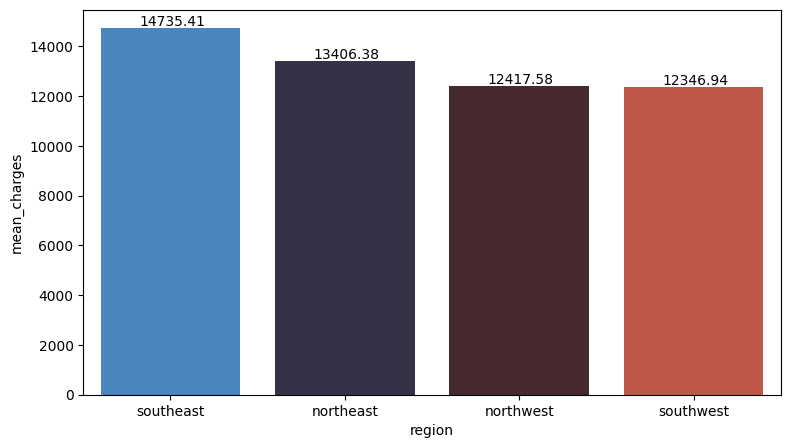

In [ ]:
plt.figure(figsize=(9, 5))
a = sns.barplot(x='region', y='mean_charges', data=region_stat.sort_values(by="mean_charges",ascending=False), palette='icefire')

total = float(len(df))
for p in a.patches:
        percentage = '{:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.18
        y = p.get_y() + p.get_height() + 100
        a.annotate(percentage, (x, y))

### 1.6.1 Rata-rata Tagihan Kesehatan Berdasarkan Wilayah & Kategori Perokok vs Non Perokok

In [ ]:
region_stats = df.groupby(["region","smoker"]).agg({'charges':['mean','median']}).reset_index()
region_stats.columns = ['region','smoker','mean_charges','median_charges']
region_stats

,region,smoker,mean_charges,median_charges
0,northeast,no,9165.531672,8342.908750
1,northeast,yes,29673.536473,28101.333050
2,northwest,no,8556.463715,7256.723100
3,northwest,yes,30192.003182,27488.996475
4,southeast,no,8032.216309,6652.528800
5,southeast,yes,34844.996824,37484.449300
6,southwest,no,8019.284513,7348.142000
7,southwest,yes,32269.063494,35165.256500


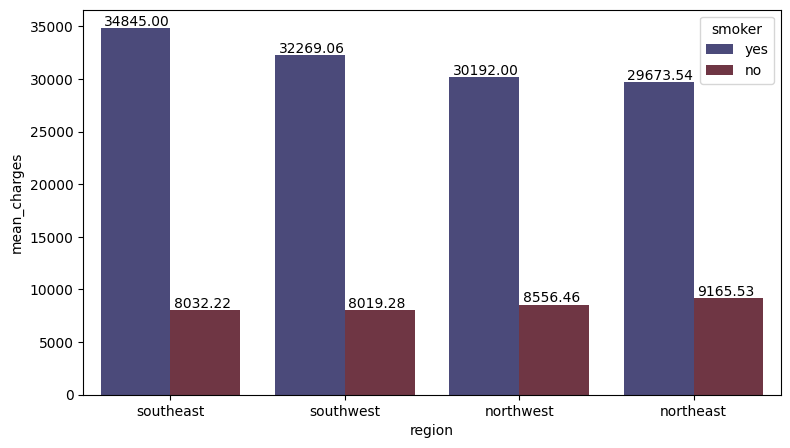

In [ ]:
plt.figure(figsize=(9, 5))
a = sns.barplot(x='region', y='mean_charges', hue='smoker', data=region_stats.sort_values(by="mean_charges",ascending=False), palette='icefire')

total = float(len(df))
for p in a.patches:
        percentage = '{:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.18
        y = p.get_y() + p.get_height() + 250
        a.annotate(percentage, (x, y))

## 1.7 Rata-rata Tagihan Kesehatan Berdasarkan Jumlah Anak

In [ ]:
child_stat = df.groupby(["children"]).agg({'charges':['mean','median']}).reset_index()
child_stat.columns = ['amount_children','mean_charges','median_charges']
child_stat.sort_values(by="mean_charges",ascending=False)

,amount_children,mean_charges,median_charges
3,3,15355.318367,10600.54830
2,2,15073.563734,9264.97915
4,4,13850.656311,11033.66170
1,1,12731.171832,8483.87015
0,0,12365.975602,9856.95190
5,5,8786.035247,8589.56505


In [ ]:
total = float(len(df))
for p in a.patches:
        percentage = '{:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.20
        y = p.get_y() + p.get_height() + 250
        a.annotate(percentage, (x, y))

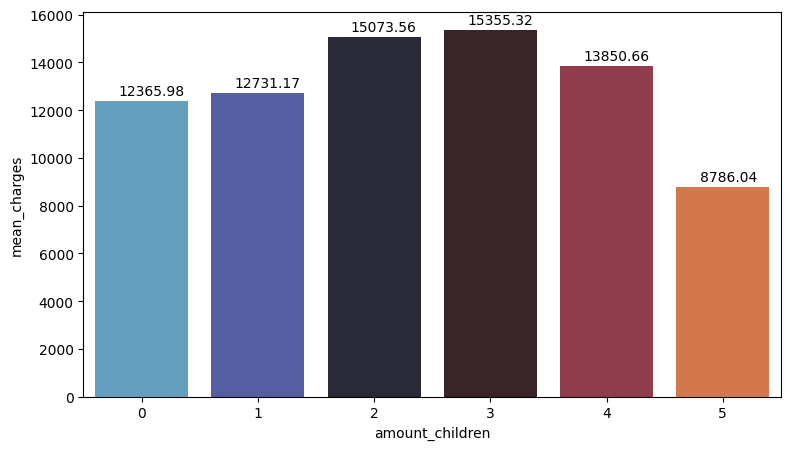

In [ ]:
#Visualisasi
plt.figure(figsize=(9, 5))
a = sns.barplot(x='amount_children', y='mean_charges', data=child_stat, palette='icefire')

total = float(len(df))
for p in a.patches:
        percentage = '{:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.20
        y = p.get_y() + p.get_height() + 250
        a.annotate(percentage, (x, y))

### 1.7.1 Rata-rata Tagihan Kesehatan Berdasarkan Jumlah Anak dan Kategori Perokok vs Non Perokok

In [ ]:
child_stat_smoke = df.groupby(["children","smoker"]).agg({'charges':['mean','median']}).reset_index()
child_stat_smoke.columns = ['amount_children','smoker','mean_charges','median_charges']
child_stat_smoke

,amount_children,smoker,mean_charges,median_charges
0,0,no,7611.793335,6185.320800
1,0,yes,31341.363954,33900.653000
2,1,no,8303.109350,7050.642000
3,1,yes,31822.654334,34806.467700
4,2,no,9493.093674,7726.854000
5,2,yes,33844.235755,38344.566000
6,3,no,9614.519391,8530.145725
7,3,yes,32724.915268,32787.458590
8,4,no,12121.344408,10996.190500
9,4,yes,26532.276933,21472.478800


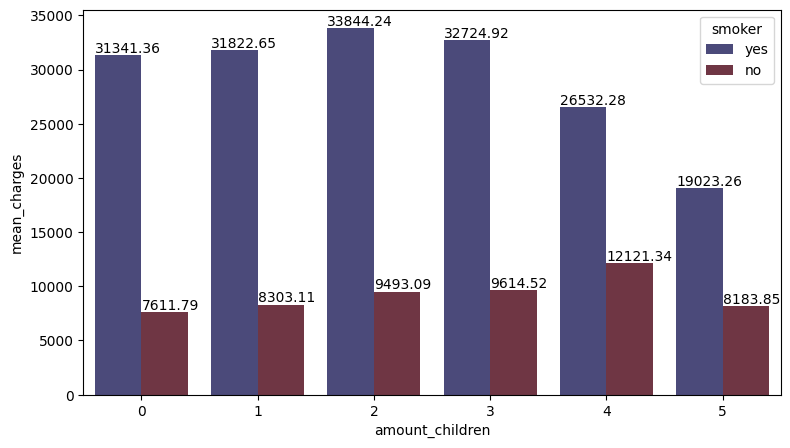

In [ ]:
#Visualisasi
plt.figure(figsize=(9, 5))
a = sns.barplot(x='amount_children', y='mean_charges', hue="smoker", data=child_stat_smoke.sort_values(by='mean_charges',ascending=False), palette='icefire')

total = float(len(df))
for p in a.patches:
        percentage = '{:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.20
        y = p.get_y() + p.get_height() + 250
        a.annotate(percentage, (x, y))

# 2. Analisa Variabel Diskrit

## 2.1 Gender Dengan Tagihan Paling Tinggi

In [ ]:
gender_charges=df.groupby("sex").agg({"charges":["mean","median","max","min"]}).reset_index()
gender_charges.columns=["sex","mean_charges","median_charges","max_charges","min_charges"]
gender_charges

,sex,mean_charges,median_charges,max_charges,min_charges
0,female,12569.578844,9412.96250,63770.42801,1607.5101
1,male,13956.751178,9369.61575,62592.87309,1121.8739


## 2.2 Proporsi Data Banyak Nasabah dari Setiap Region

In [ ]:
peluang_region = df.groupby("region").agg({"charges":["count"]}).reset_index()
peluang_region.columns=["region","jumlah_tagihan_per_region"]
peluang_region['total_keseluruhan']=sum(peluang_region['jumlah_tagihan_per_region'])
peluang_region['peluang_per_region']=peluang_region['jumlah_tagihan_per_region']/peluang_region['total_keseluruhan']
peluang_region

,region,jumlah_tagihan_per_region,total_keseluruhan,peluang_per_region
0,northeast,324,1338,0.242152
1,northwest,325,1338,0.242900
2,southeast,364,1338,0.272048
3,southwest,325,1338,0.242900


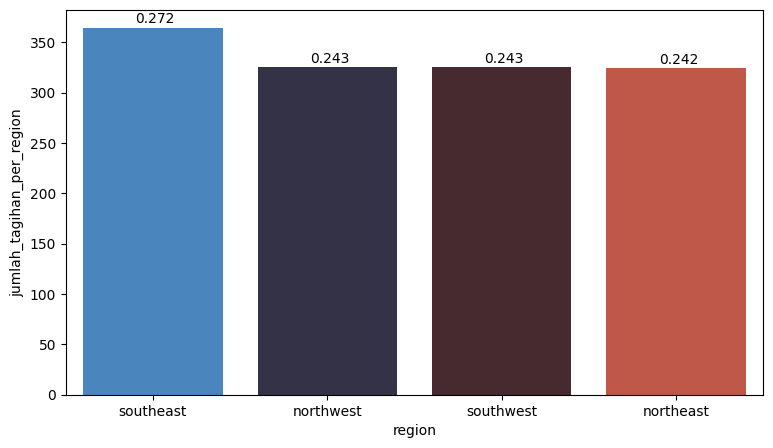

In [ ]:
plt.figure(figsize=(9, 5))
a = sns.barplot(x='region', y='jumlah_tagihan_per_region', data=peluang_region.sort_values(by="peluang_per_region",ascending=False), palette='icefire')

total = float(len(df))
for p in a.patches:
        percentage = '{:.3f}'.format(p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 5
        a.annotate(percentage, (x, y))

### 2.2.1 Proporsi Data Banyak Nasabah dari Setiap Region dan Kategori Perokok vs Non Perokok

In [ ]:
stat_region = df.groupby(["region","smoker"]).agg({'region':['count']}).reset_index()
stat_region.columns = ['region','smoker','count_region']
stat_region

,region,smoker,count_region
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


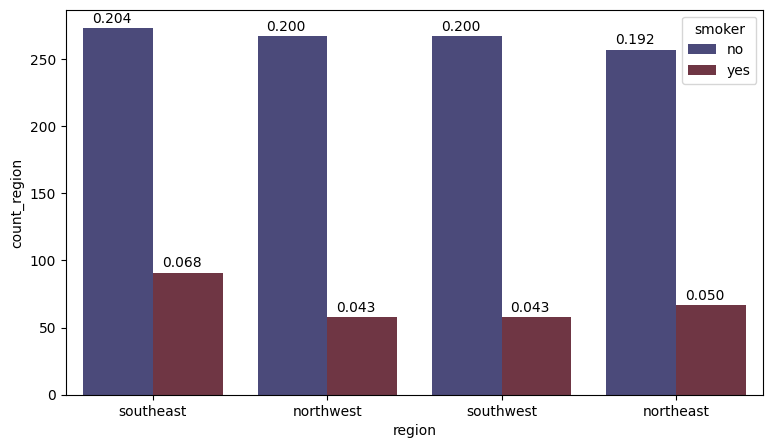

In [ ]:
plt.figure(figsize=(9, 5))
a = sns.barplot(x='region', y='count_region', hue='smoker', data=stat_region.sort_values(by='count_region',ascending=False), palette='icefire')

total = float(len(df))
for p in a.patches:
        percentage = '{:.3f}'.format(p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.15
        y = p.get_y() + p.get_height() + 4
        a.annotate(percentage, (x, y))

## 2.3 Mana yang Lebih Tinggi Proporsi Perokok atau Non Perokok?


In [ ]:
peluang_perokok_vs_non = df.groupby("smoker").agg({"smoker":["count"]}).reset_index()
peluang_perokok_vs_non.columns=["smoker","jumlah_perokok_vs_non"]
peluang_perokok_vs_non['total']=sum(peluang_perokok_vs_non["jumlah_perokok_vs_non"])
peluang_perokok_vs_non['proportion']=peluang_perokok_vs_non["jumlah_perokok_vs_non"]/peluang_perokok_vs_non["total"]
peluang_perokok_vs_non

,smoker,jumlah_perokok_vs_non,total,proportion
0,no,1064,1338,0.795217
1,yes,274,1338,0.204783


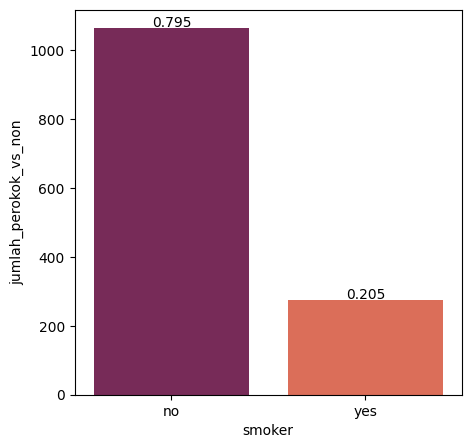

In [ ]:
plt.figure(figsize=(5, 5))
a = sns.barplot(x='smoker', y='jumlah_perokok_vs_non', data=peluang_perokok_vs_non, palette='rocket')

total = float(len(df))
for p in a.patches:
        percentage = '{:.3f}'.format(p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 5
        a.annotate(percentage, (x, y))

## 2.4 Berapa Peluang Seseorang tersebut Adalah Perempuan vs Laki-laki diketahui Dia Adalah perokok?


In [ ]:
stat_sex = df.groupby(["smoker","sex"]).agg({'sex':['count']}).reset_index()
stat_sex.columns = ['smoker','sex','count_sex']
stat_sex

,smoker,sex,count_sex
0,no,female,547
1,no,male,517
2,yes,female,115
3,yes,male,159


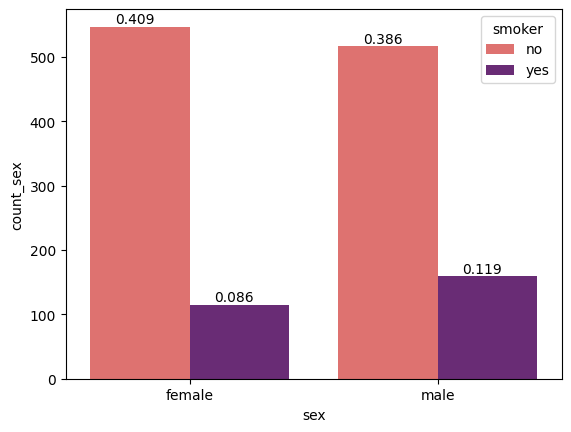

In [ ]:
#Visualisasi stat_sex
a = sns.barplot(x='sex', y='count_sex', hue='smoker', data=stat_sex, palette='magma_r')

total = float(len(df))
for p in a.patches:
        percentage = '{:.3f}'.format(p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 5
        a.annotate(percentage, (x, y))

## 2.5 Jumlah Nasabah Berdasarkan Jumlah Anak ditinjau dari Kategori Perokok vs Non Perokok

In [ ]:
stat_child = df.groupby(["children","smoker"]).agg({'children':['count','mean','median']}).reset_index()
stat_child.columns = ['child_amount','smoker','count_child','mean_child','median_child']
stat_child

,child_amount,smoker,count_child,mean_child,median_child
0,0,no,459,0.0,0.0
1,0,yes,115,0.0,0.0
2,1,no,263,1.0,1.0
3,1,yes,61,1.0,1.0
4,2,no,185,2.0,2.0
5,2,yes,55,2.0,2.0
6,3,no,118,3.0,3.0
7,3,yes,39,3.0,3.0
8,4,no,22,4.0,4.0
9,4,yes,3,4.0,4.0


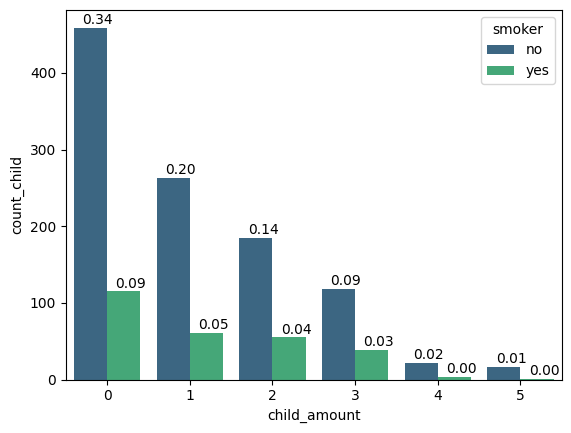

In [ ]:
a = sns.barplot(x='child_amount', y='count_child', hue='smoker', data=stat_child, palette='viridis')

total = float(len(df))
for p in a.patches:
        percentage = '{:.2f}'.format(p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.1
        y = p.get_y() + p.get_height() + 5
        a.annotate(percentage, (x, y))

# 3. Analisa Variabel Kontinu

## 3.1 Analisa Kondisi-1

Mana yang lebih mungkin terjadi:
- a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k


In [ ]:
con_a = df[(df["charges"]>16700)]

In [ ]:
index = pd.Index(["bmi<=25","bmi>25"])
peluang_one =  con_a.groupby(con_a["bmi"]>25).count()
peluang_one = peluang_one[['bmi']].set_index(index)
peluang_one.rename(columns = {'bmi':'amount_customer'}, inplace = True)
peluang_one['total'] = sum(peluang_one['amount_customer'])
peluang_one['peluang'] = peluang_one['amount_customer']/peluang_one['total']
peluang_one

,amount_customer,total,peluang
bmi<=25,51,334,0.152695
bmi>25,283,334,0.847305


## 3.2 Analisa Kondisi-2

Mana yang lebih mungkin terjadi
- a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau
- b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k


In [ ]:
con_b = df[(df["charges"]>16700)&(df["bmi"]>25)]

In [ ]:
index = pd.Index(["non_perokok","perokok"])
peluang_one =  con_b.groupby("smoker").count()
peluang_one = peluang_one[['bmi']].set_index(index)
peluang_one.rename(columns = {'bmi':'amount_customer'}, inplace = True)
peluang_one['total'] = sum(peluang_one['amount_customer'])
peluang_one['peluang'] = peluang_one['amount_customer']/peluang_one['total']
peluang_one

,amount_customer,total,peluang
non_perokok,68,283,0.240283
perokok,215,283,0.759717


# 4. Analisa Korelasi Variabel

<ipython-input-42-9d68f6cbe000>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdPu', annot=True, fmt='.2f')


<Axes: >

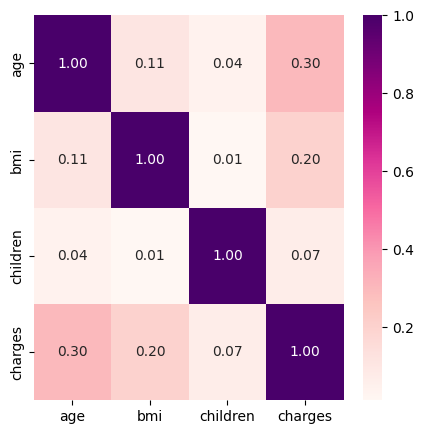

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), cmap='RdPu', annot=True, fmt='.2f')

# 5. Pengujian Hipotesis

## 5.1 Tagihan Kesehatan Perokok Lebih Tinggi dari Tagihan Kesehatan non Perokok

a. Penentuan Hipotesa
- Ho: Tagihan kesehatan nasabah perokok ≤ Tagihan kesehatan nasabah non perokok

- H1: Tagihan kesehatan nasabah perokok > Tagihan kesehatan nasabah non perokok

b. Penentuan Tingkat Signifikansi dan Z-crit Value

In [ ]:
alpha = 0.05 #rule of tumb in insdustry used
z_crit = stats.norm.ppf(1-alpha) #penentuan z-critical value saat alpha=0.05 untuk right tailed test
z_crit

1.6448536269514722

c. Melakukan Test Uji Hipotesis
- Pengujian menggunakan ztest karena jumlah sampel > 30 dengan
tipe right tailed test

In [ ]:
charges_smoker = df[df['smoker']=="yes"]['charges']
charges_non_smoker = df[df['smoker']=="no"]['charges']

z_score, p_value = ztest(charges_smoker, charges_non_smoker, alternative='larger')

print('Z-score:', z_score)
print('P-value:', p_value)

Z-score: 46.66492117272371
P-value: 0.0


d. Pengambilan Keputusan

In [ ]:
if (p_value < alpha) and (z_score > z_crit):
  print("Pengambilan Keputusan: Menolak Ho")
else:
  print("Pengambilan Keputusan: Menolak H1")

Pengambilan Keputusan: Menolak Ho


## 5.2 Tagihan Kesehatan Laki-laki Lebih Besar dari Perempuan

a. Penentuan Hipotesa

- Ho: Tagihan kesehatan laki-laki ≤ Tagihan kesehatan perempuan
- H1: Tagihan kesehatan laki-laki > Tagihan kesehatan perempuan

b. Penentuan Tingkat Signifikansi dan Z-crit Value

In [ ]:
alpha = 0.05 #rule of tumb in insdustry used
z_crit = stats.norm.ppf(1-alpha) #penentuan z-critical value saat alpha=0.05 untuk right tailed test
z_crit

1.6448536269514722

c. Melakukan Test Uji Hipotesis
- Pengujian menggunakan ztest karena jumlah sampel > 30 dengan
tipe right tailed test

In [ ]:
charges_male = df[df['sex']=="male"]['charges']
charges_female = df[df['sex']=="female"]['charges']

z_score, p_value = ztest(charges_male, charges_female, alternative='larger')

print('Z-score:', z_score)
print('P-value:', p_value)

Z-score: 2.097546590051688
P-value: 0.017972608708410026


d. Pengambilan Keputusan

In [ ]:
if (p_value < alpha) and (z_score > z_crit):
  print("Pengambilan Keputusan: Menolak Ho")
else:
  print("Pengambilan Keputusan: Menolak H1")

Pengambilan Keputusan: Menolak Ho


## 5.3 Tagihan Kesehatan dengan BMI diatas 25 Lebih Tinggi daripada Tagihan Kesehatan dengan BMI dibawah 25

a. Penentuan Hipotesa

- Ho: Tagihan kesehatan nasabah perokok = Tagihan kesehatan nasabah non perokok

- H1: Tagihan kesehatan nasabah perokok > Tagihan kesehatan nasabah non perokok

b. Penentuan Tingkat Signifikansi dan Z-crit Value

In [ ]:
alpha = 0.05 #rule of tumb in insdustry used
z_crit = stats.norm.ppf(1-alpha) #penentuan z-critical value saat alpha=0.05 untuk right tailed test
z_crit

1.6448536269514722

c. Melakukan Test Uji Hipotesis
- Pengujian menggunakan ztest karena jumlah sampel > 30 dengan
tipe right tailed test

In [ ]:
charges_bmi_up_25 = df[df['bmi']>25]['charges']
charges_bmi_down_25 = df[df['bmi']<=25]['charges']

z_score, p_value = ztest(charges_bmi_up_25, charges_bmi_down_25, alternative='larger')

print('Z-score:', z_score)
print('P-value:', p_value)

Z-score: 4.319946909530397
P-value: 7.803337139644701e-06


d. Pengambilan Keputusan

In [ ]:
if (p_value < alpha) and (z_score > z_crit):
  print("Pengambilan Keputusan: Menolak Ho")
else:
  print("Pengambilan Keputusan: Menolak H1")

Pengambilan Keputusan: Menolak Ho
